In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps
import matplotlib as mpl

dataset = pd.read_csv("dataset_concat.csv")

In [2]:
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['text.usetex'] = False
# Color cycle for color blind Source: https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']   # https://gist.github.com/thriveth/8560036

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=CB_color_cycle) 

# Function for a consistent length of figures of 84 mm, converting to inches
def new_figure(height=55):
    "Return figure with width 84mm and given height in mm."
    return plt.figure(figsize=(84/10.16, height/10.16))

In [3]:
dataset.head()

,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime
0,merge_sort,sorted,10,0.267837,7,2019-11-01 21:51:45.110982
1,merge_sort,sorted,10,0.277732,7,2019-11-01 21:51:45.110982
2,merge_sort,sorted,10,0.274984,7,2019-11-01 21:51:45.110982
3,merge_sort,sorted,10,0.250366,7,2019-11-01 21:51:45.110982
4,merge_sort,sorted,10,0.233188,7,2019-11-01 21:51:45.110982


In [4]:
size = int( 10485760/2)
filter = (dataset['List_length']==size)

df_ten_mil = pd.DataFrame( dataset[filter] )
df_ten_mil.reset_index( drop = True, inplace=True)


df_ten_mil['Single_runtime'] =  df_ten_mil['Runtimes']/df_ten_mil['Number_of_repeatitions']  
#Warning can be ignored
print( df_ten_mil.shape[0])
df_ten_mil.head()

91


,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime,Single_runtime
0,merge_sort,sorted,5242880,157.464569,7,2019-11-01 22:37:02.767128,22.494938
1,merge_sort,sorted,5242880,139.790303,7,2019-11-01 22:37:02.767128,19.970043
2,merge_sort,sorted,5242880,192.275672,7,2019-11-01 22:37:02.767128,27.467953
3,merge_sort,sorted,5242880,249.031508,7,2019-11-01 22:37:02.767128,35.575930
4,merge_sort,sorted,5242880,169.889710,7,2019-11-01 22:37:02.767128,24.269959


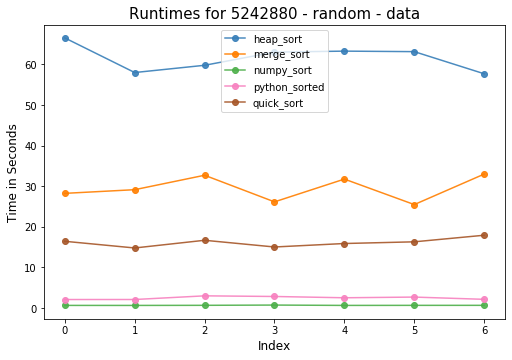

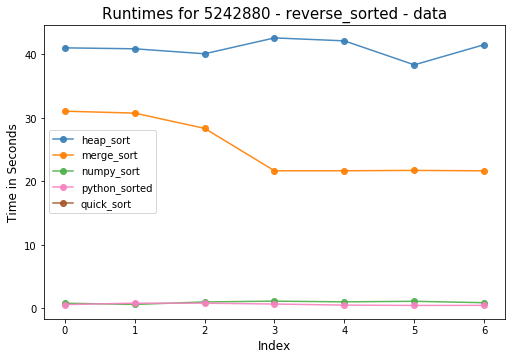

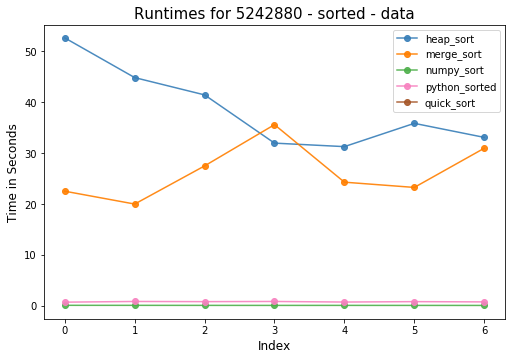

In [5]:
types_of_data= sorted( np.unique(df_ten_mil['Data_Type_or_List_type']).tolist() )
types_of_sorts=  np.unique(df_ten_mil['Sort_Type']).tolist() 

for data_type in types_of_data:
    fig = new_figure()
    filter01 = (df_ten_mil['Data_Type_or_List_type']==data_type)
    df_data_type = df_ten_mil[filter01]  
    
    for sort in types_of_sorts: 
        filter02 = (df_data_type['Sort_Type']==sort)
        plot_this = df_data_type[filter02] 
        
        plot_this.reset_index(drop=True, inplace=True)
        plt.plot( plot_this['Single_runtime'],'-o',alpha=0.9, label=sort)
    plt.legend()    
    plt.xlabel('Index')
    plt.ylabel('Time in Seconds')
    plt.title("Runtimes for "+str(size)+" - "+data_type+" - data")
    plt.show()


In [6]:
np.log2(20200)

14.302067672526519